### 전처리 : 특성 공학 기법 사용

In [1]:
import pandas as pd
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


#### 결측치
- 결측치 확인 : df.isnull().sum()
- 결측치 치환 : 대표값 또는 knn(머신러닝 한 종류)
- 결측치 삭제 : dropna(subset=['', ''])

In [6]:
df_TOCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [4]:
df_TOCC.isnull().sum()

id                       0
type_of_contract         4
type_of_contract2        1
channel                  0
datetime                 0
Term                     0
payment_type             0
product                  1
amount                   0
state                    0
overdue_count            0
overdue                  2
credit rating         8783
bank                  2760
cancellation            25
age                  10795
Mileage              10795
dtype: int64

In [8]:
df_TOCC_dropna = df_TOCC.dropna()
df_TOCC_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40480 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40480 non-null  int64  
 1   type_of_contract   40480 non-null  object 
 2   type_of_contract2  40480 non-null  object 
 3   channel            40480 non-null  object 
 4   datetime           40480 non-null  object 
 5   Term               40480 non-null  int64  
 6   payment_type       40480 non-null  object 
 7   product            40480 non-null  object 
 8   amount             40480 non-null  int64  
 9   state              40480 non-null  object 
 10  overdue_count      40480 non-null  int64  
 11  overdue            40480 non-null  object 
 12  credit rating      40480 non-null  float64
 13  bank               40480 non-null  object 
 14  cancellation       40480 non-null  object 
 15  age                40480 non-null  float64
 16  Mileage            404

In [10]:
df_TOCC.dropna(subset=['bank']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48544 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 48544 non-null  int64  
 1   type_of_contract   48540 non-null  object 
 2   type_of_contract2  48543 non-null  object 
 3   channel            48544 non-null  object 
 4   datetime           48544 non-null  object 
 5   Term               48544 non-null  int64  
 6   payment_type       48544 non-null  object 
 7   product            48543 non-null  object 
 8   amount             48544 non-null  int64  
 9   state              48544 non-null  object 
 10  overdue_count      48544 non-null  int64  
 11  overdue            48542 non-null  object 
 12  credit rating      42519 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       48519 non-null  object 
 15  age                40507 non-null  float64
 16  Mileage            405

#### 이상치 : 사분위 외 값
- Q3 + 1.5 * IQR, Q1 - 1.5 * IQR 밖에 값

In [12]:
df_TOCC['age'].describe()

count    40509.000000
mean        46.608285
std         13.465977
min         20.000000
25%         37.000000
50%         46.000000
75%         56.000000
max        107.000000
Name: age, dtype: float64

In [18]:
# Q1, Q3 구함
Q1 = df_TOCC['age'].describe()['25%']
Q3 = df_TOCC['age'].describe()['75%']
IQR = Q3 - Q1

In [19]:
Q1, Q3, IQR

(37.0, 56.0, 19.0)

In [21]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low, bound_up 

(8.5, 84.5)

In [29]:
# filler
condition = (df_TOCC['age'] <= bound_up) # 긍정 조건 변환
condition

0         True
1         True
2         True
3         True
4         True
         ...  
51299    False
51300     True
51301     True
51302     True
51303     True
Name: age, Length: 51304, dtype: bool

In [30]:
df_TOCC_condition = df_TOCC[condition]
df_TOCC_condition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40338 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40338 non-null  int64  
 1   type_of_contract   40335 non-null  object 
 2   type_of_contract2  40337 non-null  object 
 3   channel            40338 non-null  object 
 4   datetime           40338 non-null  object 
 5   Term               40338 non-null  int64  
 6   payment_type       40338 non-null  object 
 7   product            40337 non-null  object 
 8   amount             40338 non-null  int64  
 9   state              40338 non-null  object 
 10  overdue_count      40338 non-null  int64  
 11  overdue            40336 non-null  object 
 12  credit rating      40338 non-null  float64
 13  bank               40336 non-null  object 
 14  cancellation       40318 non-null  object 
 15  age                40338 non-null  float64
 16  Mileage            403

<AxesSubplot:xlabel='age'>

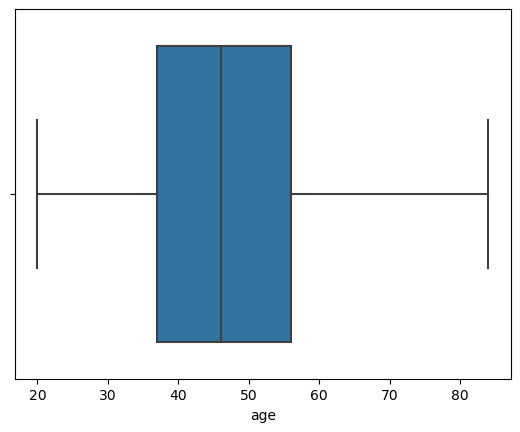

In [33]:
import seaborn as sns
sns.boxplot(df_TOCC_condition['age'])

C:\Users\05-16\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

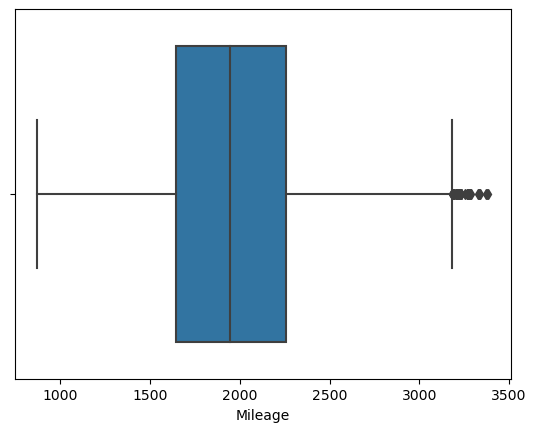

In [36]:
sns.boxplot(df_TOCC_condition['Mileage'])